In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

### Loading the data

In [2]:
df=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Data Exploring:-

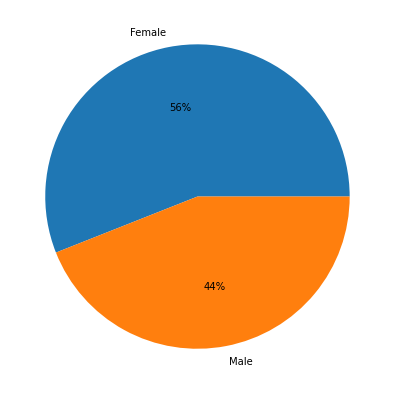

In [6]:
item1=df['Gender'].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.pie(item1, labels = item1.index,autopct = '%.f%%')
 
# show plot
plt.show()

Here we can say that 56% female and 44% males are present in dataset

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

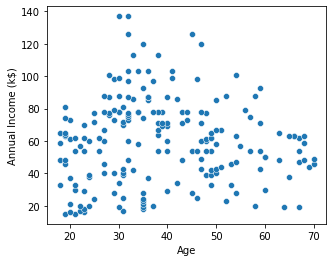

In [7]:
import seaborn as sns
fig = plt.figure(figsize =(5,4))
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)')

Age between 30-40 has the highest annual income 

<Figure size 360x288 with 0 Axes>

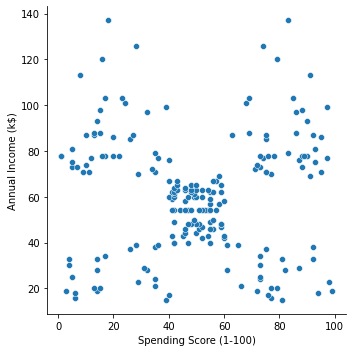

In [8]:
fig = plt.figure(figsize =(5,4))
sns.relplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)')

Here the spending score between 40-60 has low annual income compare to other 

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

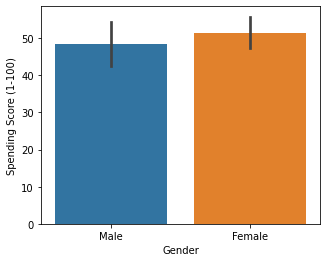

In [9]:
fig = plt.figure(figsize =(5,4))
sns.barplot(data=df,x='Gender',y='Spending Score (1-100)')

Here Female has highest spending score compare to males

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

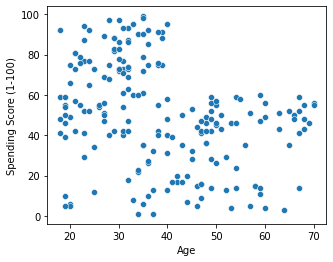

In [10]:
fig = plt.figure(figsize =(5,4))
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)')

<AxesSubplot:xlabel='Age', ylabel='Count'>

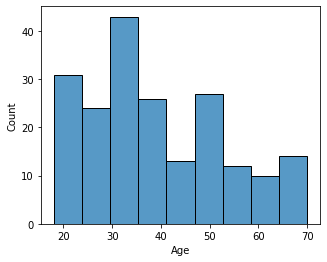

In [11]:
fig = plt.figure(figsize =(5,4))
sns.histplot(df['Age'])

Here Majority age of 30-40 people are present in our dataset

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']=df['Gender'].astype("category")
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [13]:
df=df.drop("CustomerID",axis=1)

In [14]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [15]:
age=df.iloc[:,[1,3]].values
income=df.iloc[:,[2,3]].values

#### Kmeans clustering

In [16]:
from sklearn.cluster import DBSCAN, KMeans 

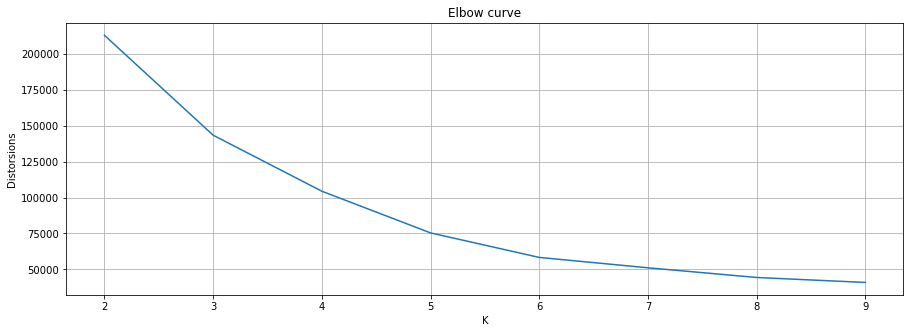

In [17]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [18]:
def distorsion(data):
    distorsions = []
    for k in range(2,20,2):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2,20,2), distorsions)
    plt.grid(True)
    plt.xlabel('K')
    plt.ylabel('Distorsions')
    plt.title('Elbow curve');
    
from sklearn.metrics import silhouette_samples, silhouette_score

def clusters(data):
    for n_clusters in range (2,20,2):
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg) 
  

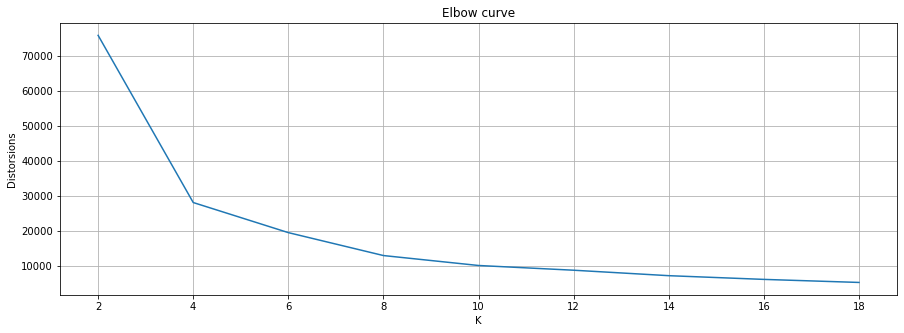

In [19]:
distorsion(age)

In [20]:
clusters(age)

For n_clusters = 2 The average silhouette_score is : 0.4692341232501655
For n_clusters = 4 The average silhouette_score is : 0.49973941540141753
For n_clusters = 6 The average silhouette_score is : 0.4376185638584134
For n_clusters = 8 The average silhouette_score is : 0.4304921688137185
For n_clusters = 10 The average silhouette_score is : 0.40542078190094527
For n_clusters = 12 The average silhouette_score is : 0.40389092365398627
For n_clusters = 14 The average silhouette_score is : 0.4094048075198883
For n_clusters = 16 The average silhouette_score is : 0.39397363580757205
For n_clusters = 18 The average silhouette_score is : 0.4085372361355948


In [21]:
Kmeans_model = KMeans(n_clusters=6)
Kmeans_age=Kmeans_model.fit(age)
cluster_centroid = Kmeans_model.cluster_centers_
labels = Kmeans_model.labels_
kmeans_score = silhouette_score(age, labels)
kmeans_score

0.4405479018621985

In [22]:
results=list()
names=list()
results.append(kmeans_score)
names.append('kmeans')

In [23]:
def scatter_plot(x,y,label,xlabel1,ylabel1,title1):
    plt.figure(figsize =(6, 6))
    plt.scatter(x,y,c=label, cmap ='rainbow')
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel1)
    plt.title(title1)
    plt.show()

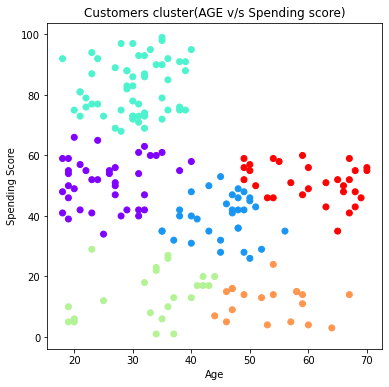

In [24]:
scatter_plot(df['Age'],df['Spending Score (1-100)'],labels,'Age','Spending Score','Customers cluster(AGE v/s Spending score)')

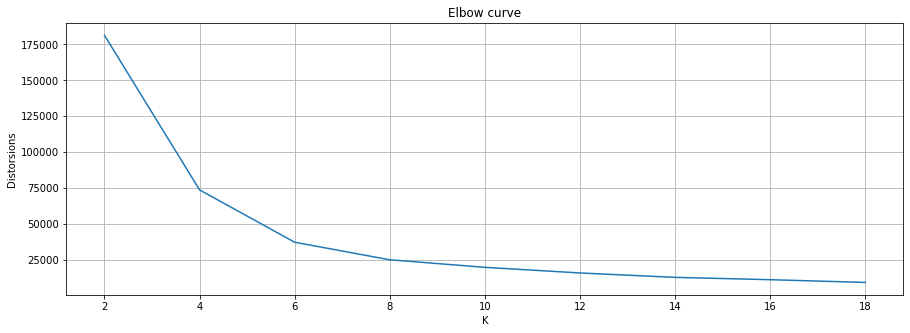

In [25]:
distorsion(income)

In [26]:
clusters(income)

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 8 The average silhouette_score is : 0.4572211842776841
For n_clusters = 10 The average silhouette_score is : 0.4467356774401869
For n_clusters = 12 The average silhouette_score is : 0.4267928147986293
For n_clusters = 14 The average silhouette_score is : 0.43623474793328404
For n_clusters = 16 The average silhouette_score is : 0.4177588115411932
For n_clusters = 18 The average silhouette_score is : 0.43386019711220697


In [27]:
Kmeans_model = KMeans(n_clusters=6)
y_means=Kmeans_model.fit(income)
cluster_centroid = Kmeans_model.cluster_centers_
labels_income = Kmeans_model.labels_
kmeans_income_score = silhouette_score(income, labels_income)
kmeans_income_score

0.5379675585622219

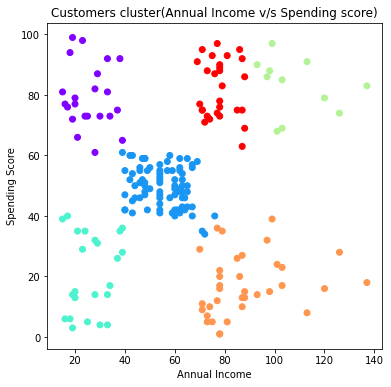

In [28]:
scatter_plot(df['Annual Income (k$)'],df['Spending Score (1-100)'],labels_income,'Annual Income','Spending Score','Customers cluster(Annual Income v/s Spending score)')

#### Agglomerative Clustering

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [30]:
def dendogram(data,x):
    plt.figure(figsize=(30, 10))
    dendrogrm = sch.dendrogram(sch.linkage(data, method = 'ward'),labels=df.index)
    ax = plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=10)
    plt.title('shopping mall Dendrogram',fontsize=30)
    plt.xlabel(x,fontsize=20)
    plt.ylabel('Euclidean distance', fontsize=20)
    plt.show()

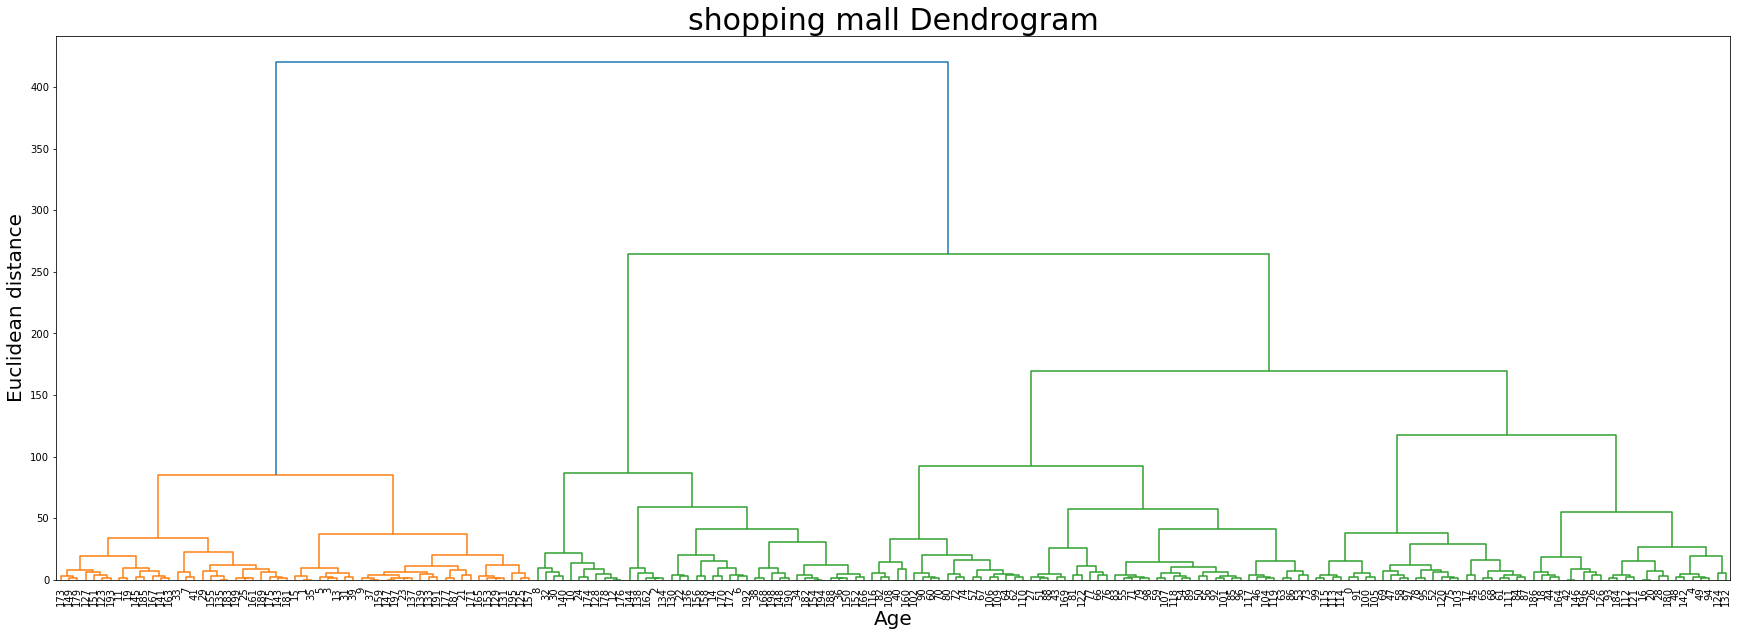

In [31]:
dendogram(age,'Age')

In [32]:
clusterer = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_predict = clusterer.fit_predict(age)
cluster_labels = clusterer.labels_
silhouette_agglo = silhouette_score(age, cluster_labels)
silhouette_agglo

0.40374071753059787

In [33]:
results.append(silhouette_agglo)
names.append('agglomerative')

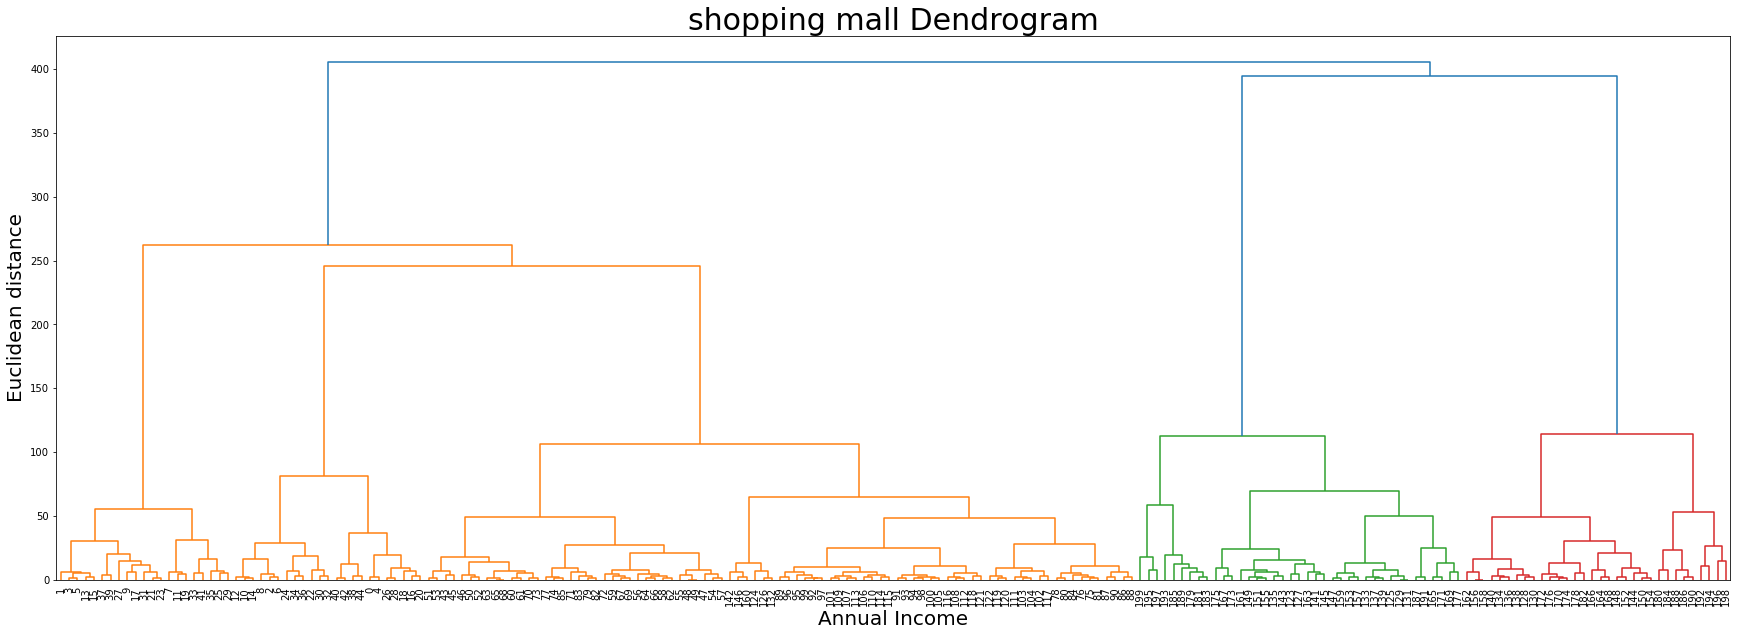

In [34]:
dendogram(income,'Annual Income')

In [35]:
clusterer = AgglomerativeClustering(n_clusters=6, linkage='ward')
y_predict = clusterer.fit_predict(age)
cluster_labels1 = clusterer.labels_
silhouette_Income_agglo = silhouette_score(age, cluster_labels1)
silhouette_Income_agglo

0.4125958704145705

#### DBSCAN

In [36]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(age)
distances, indices = nbrs.kneighbors(age)

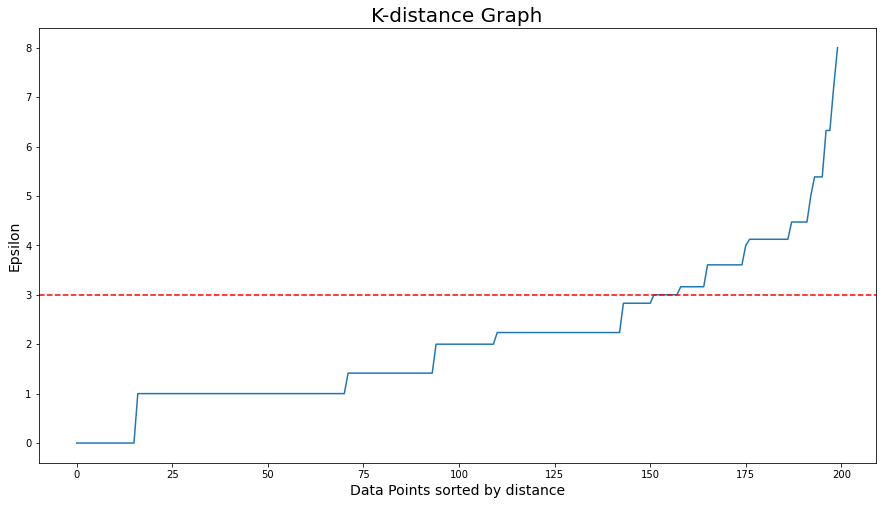

In [37]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [38]:
eps=3
for min_samples in range(2,20,2):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(age)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 3 | min_samples=  2 | obtained clustering:  [(1, 42), (2, 2), (3, 8), (4, 3), (5, 5), (6, 2), (7, 2), (8, 10), (9, 2), (10, 4), (11, 2), (12, 2), (13, 2), (14, 2), (15, 9), (16, 5), (17, 4), (18, 5), (19, 2), (20, 2), (21, 2), (22, 4), (23, 3), (24, 16), (25, 7), (26, 3), (27, 6), (28, 2), (29, 2), (30, 5), (31, 2), (32, 4), (33, 4), (34, 2), (35, 6), (36, 2), (37, 4), (38, 3), (39, 2), (40, 2), (41, 2), (42, 2)]
eps= 3 | min_samples=  4 | obtained clustering:  [(1, 103), (2, 7), (3, 5), (4, 10), (5, 4), (6, 4), (7, 14), (8, 5), (9, 7), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 9), (16, 4), (17, 4), (18, 4)]
eps= 3 | min_samples=  6 | obtained clustering:  [(1, 170), (2, 10), (3, 6), (4, 8), (5, 6)]
eps= 3 | min_samples=  8 | obtained clustering:  [(1, 191), (2, 9)]
eps= 3 | min_samples=  10 | obtained clustering:  [(1, 200)]
eps= 3 | min_samples=  12 | obtained clustering:  [(1, 200)]
eps= 3 | min_samples=  14 | obtained clustering:  [(1, 200)]
eps= 3 | min_samples=  16 |

In [39]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=3,min_samples=6)
dbscan_opt.fit(age)

DBSCAN(eps=3, min_samples=6)

In [40]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

-1    170
 0     10
 2      8
 1      6
 3      6
Name: DBSCAN_opt_labels, dtype: int64

In [41]:
df['DBSCAN_opt_labels']

0     -1
1      1
2     -1
3      1
4     -1
      ..
195   -1
196   -1
197    0
198   -1
199    3
Name: DBSCAN_opt_labels, Length: 200, dtype: int64

In [42]:
from sklearn import metrics

Silhouette_dbscan=metrics.silhouette_score(age, df['DBSCAN_opt_labels'])
Silhouette_dbscan

-0.2830824702199763

In [43]:
results.append(Silhouette_dbscan)
names.append('dbscan')

In [44]:
#dbscan for income

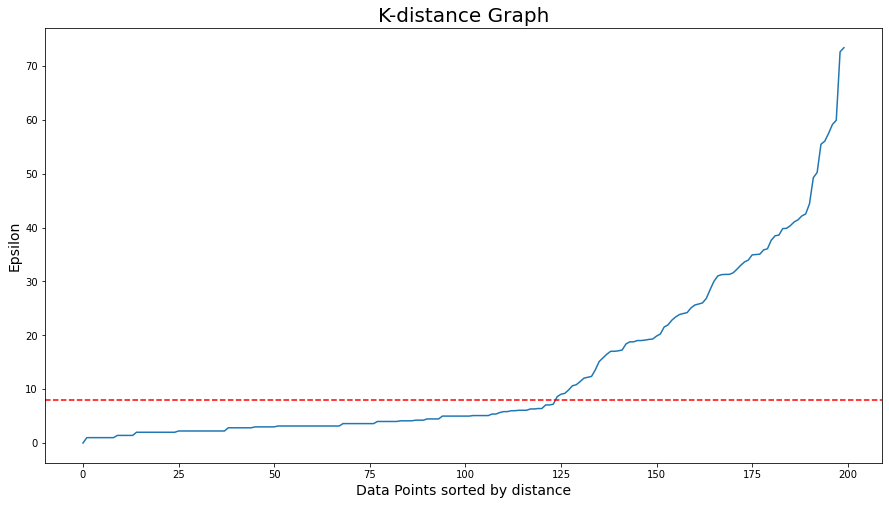

eps= 8 | min_samples=  2 | obtained clustering:  [(1, 8), (2, 7), (3, 17), (4, 9), (5, 3), (6, 3), (7, 89), (8, 32), (9, 26), (10, 2), (11, 2), (12, 2)]
eps= 8 | min_samples=  4 | obtained clustering:  [(1, 22), (2, 16), (3, 8), (4, 7), (5, 89), (6, 32), (7, 23), (8, 3)]
eps= 8 | min_samples=  6 | obtained clustering:  [(1, 47), (2, 10), (3, 6), (4, 88), (5, 26), (6, 23)]
eps= 8 | min_samples=  8 | obtained clustering:  [(1, 71), (2, 10), (3, 83), (4, 24), (5, 12)]
eps= 8 | min_samples=  10 | obtained clustering:  [(1, 85), (2, 83), (3, 12), (4, 10), (5, 10)]
eps= 8 | min_samples=  12 | obtained clustering:  [(1, 119), (2, 81)]
eps= 8 | min_samples=  14 | obtained clustering:  [(1, 121), (2, 79)]
eps= 8 | min_samples=  16 | obtained clustering:  [(1, 123), (2, 77)]
eps= 8 | min_samples=  18 | obtained clustering:  [(1, 123), (2, 77)]


In [45]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(age)
distances, indices = nbrs.kneighbors(income)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=8, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

eps=8
for min_samples in range(2,20,2):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(income)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)
    


In [46]:
dbscan_opt=DBSCAN(eps=8,min_samples=8)
dbscan_opt.fit(income)

DBSCAN(eps=8, min_samples=8)

In [47]:
df['DBSCAN_opt_labels1']=dbscan_opt.labels_
df['DBSCAN_opt_labels1'].value_counts()

 1    83
-1    71
 2    24
 3    12
 0    10
Name: DBSCAN_opt_labels1, dtype: int64

In [48]:
Silhouette__income_dbscan=metrics.silhouette_score(income, df['DBSCAN_opt_labels1'])
Silhouette__income_dbscan

0.23130655888279378

In [49]:
print("silhouette_score for K-Means Age and spending scores: ",kmeans_score)
print("silhouette_score for K-Means Income and spending scores: ",kmeans_income_score)
print("silhouette_score for Agglomerative Age and spending scores: ",silhouette_agglo)
print("silhouette_score for K-Agglomerative Income and spending scores: ",silhouette_Income_agglo)
print("silhouette_score for DBSCAN Age and spending scores: ",Silhouette_dbscan)
print("silhouette_score for DBSCAN Income and spending scores: ",Silhouette__income_dbscan)

silhouette_score for K-Means Age and spending scores:  0.4405479018621985
silhouette_score for K-Means Income and spending scores:  0.5379675585622219
silhouette_score for Agglomerative Age and spending scores:  0.40374071753059787
silhouette_score for K-Agglomerative Income and spending scores:  0.4125958704145705
silhouette_score for DBSCAN Age and spending scores:  -0.2830824702199763
silhouette_score for DBSCAN Income and spending scores:  0.23130655888279378


#### Conclusion : As the Cluster formation of KMeans is better than Hierarchical Clustering and also there isnt a big difference in silhouette coefficient also, We can consider KMeans Clustering for this problem statement

#### As from the analysis female has the best performance compare to males so we can more focus on that point for future prospective 